___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('./Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [135]:
# CODE HERE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [137]:
# CODE HERE

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [139]:
# CODE HERE

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [141]:
# CODE HERE

<AxesSubplot:xlabel='Churn', ylabel='count'>

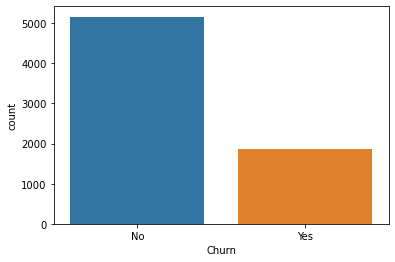

In [7]:
sbn.countplot(data=df,x="Churn")

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

In [143]:
# CODE HERE

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

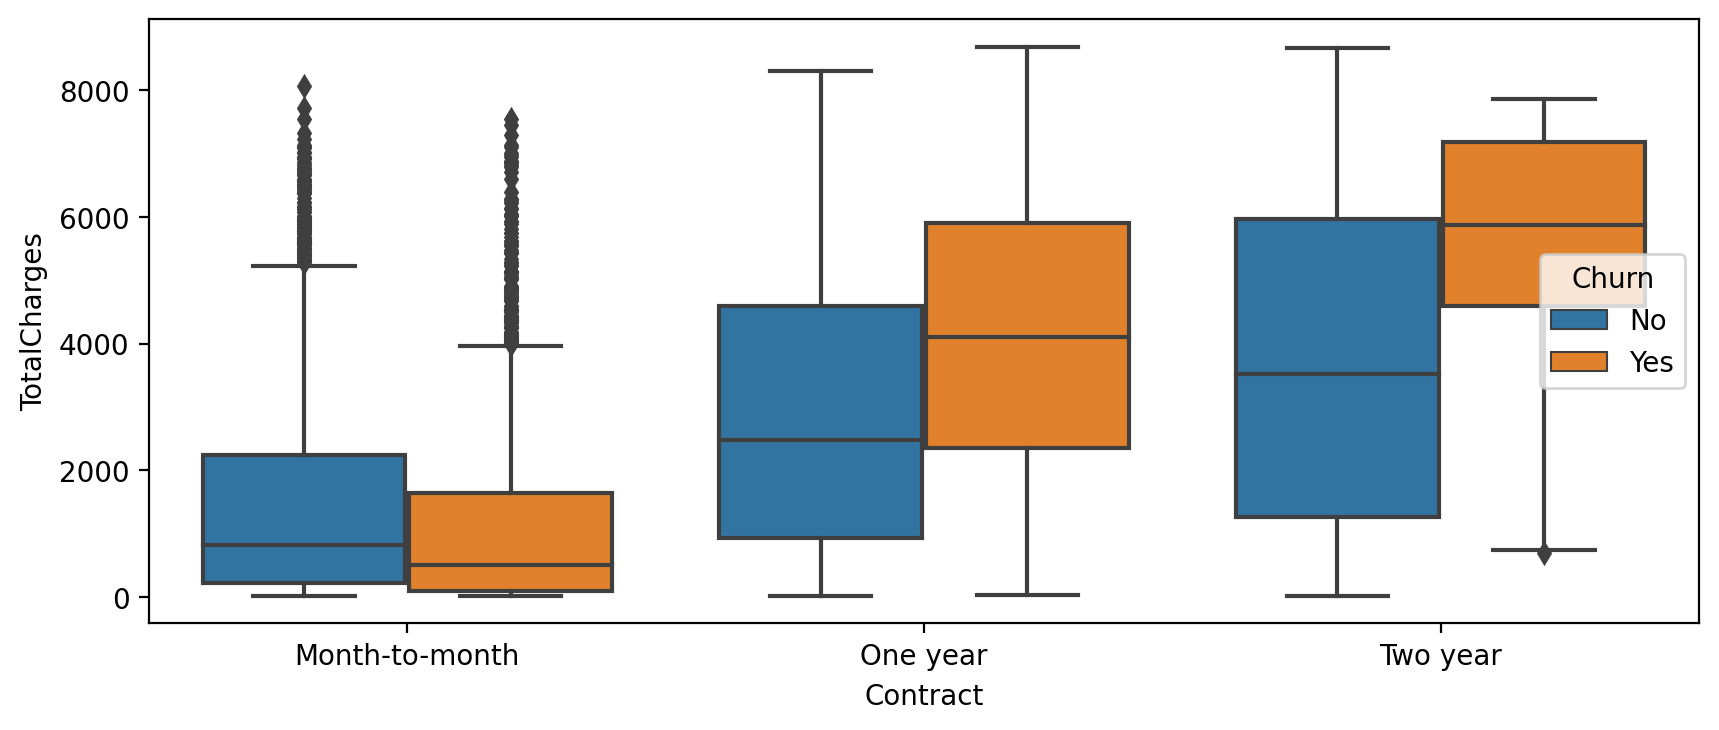

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sbn.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [145]:
#CODE HERE

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

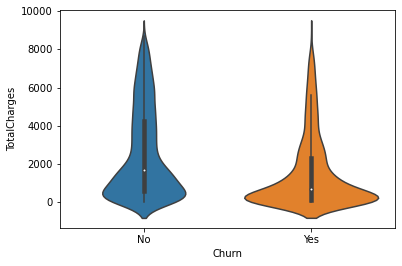

In [10]:
sbn.violinplot(data=df,x="Churn",y="TotalCharges")

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [147]:
#CODE HERE

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],drop_first=True).corr()


In [12]:
corr_df["Churn_Yes"].sort_values()

NameError: name 'corr_df' is not defined

<AxesSubplot:ylabel='Churn_Yes'>

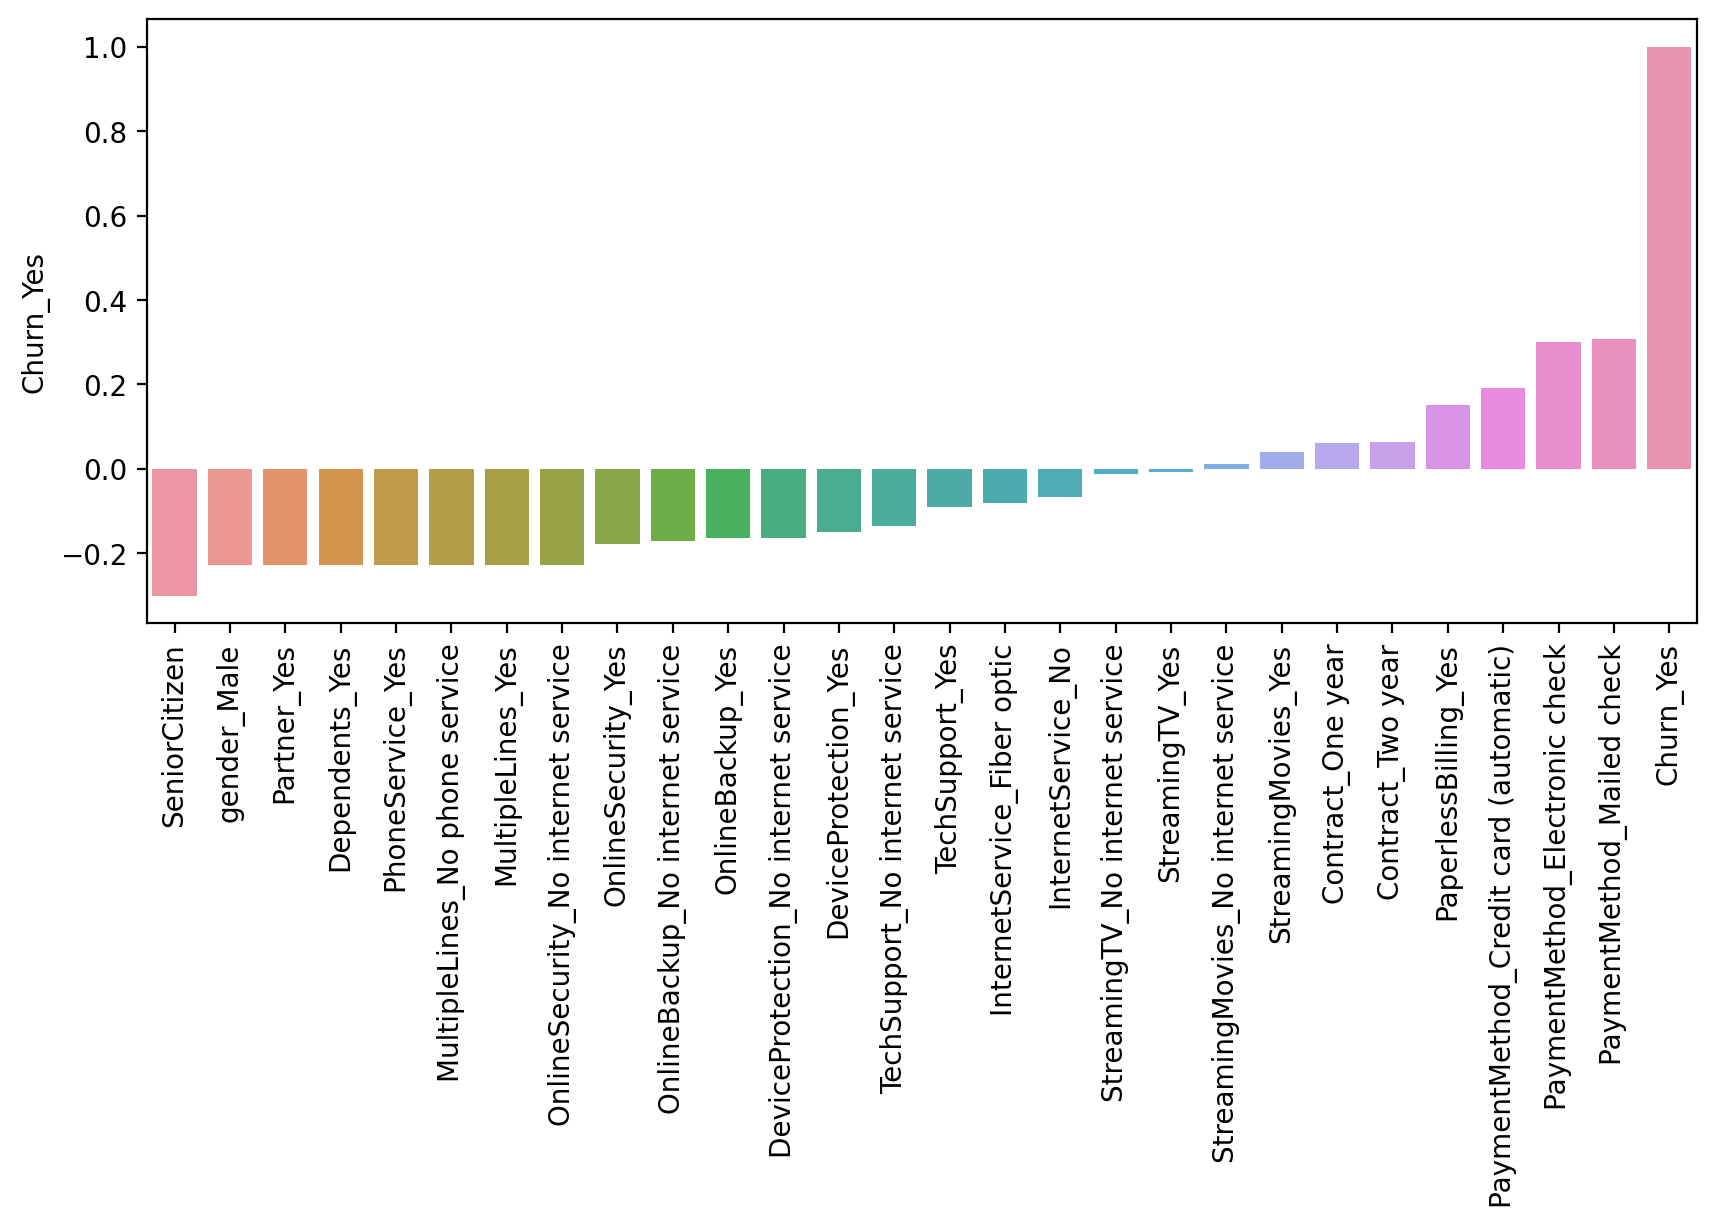

In [40]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation='90')
sbn.barplot(x=corr_df["Churn_Yes"].index,y=corr_df["Churn_Yes"].sort_values())


<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [152]:
# CODE HERE

In [13]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [154]:
#CODE HERE

<AxesSubplot:xlabel='tenure', ylabel='Count'>

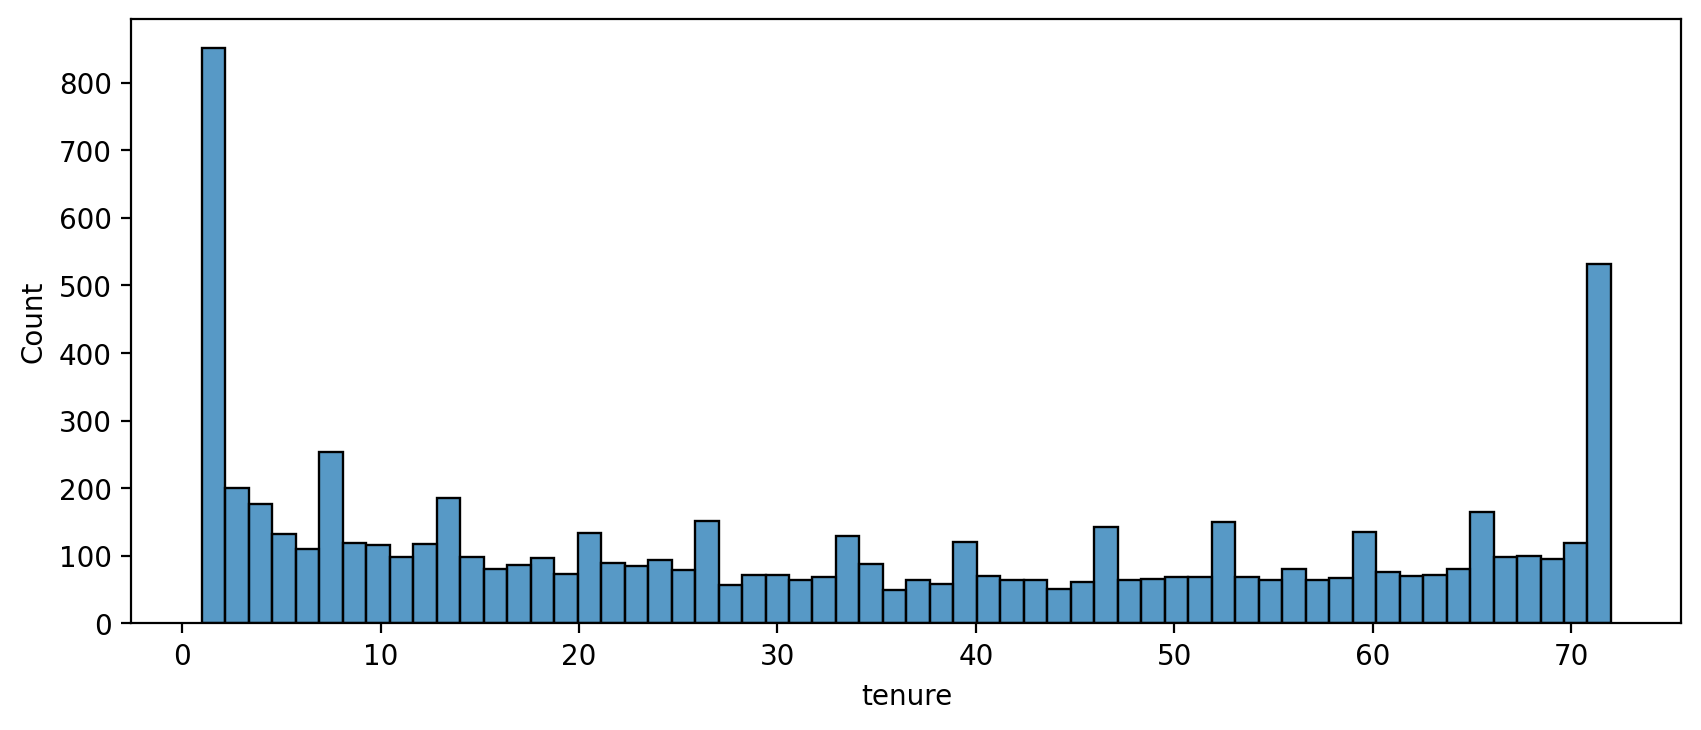

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sbn.histplot(data=df,x=df["tenure"],bins=60)

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [156]:
#CODE HERE

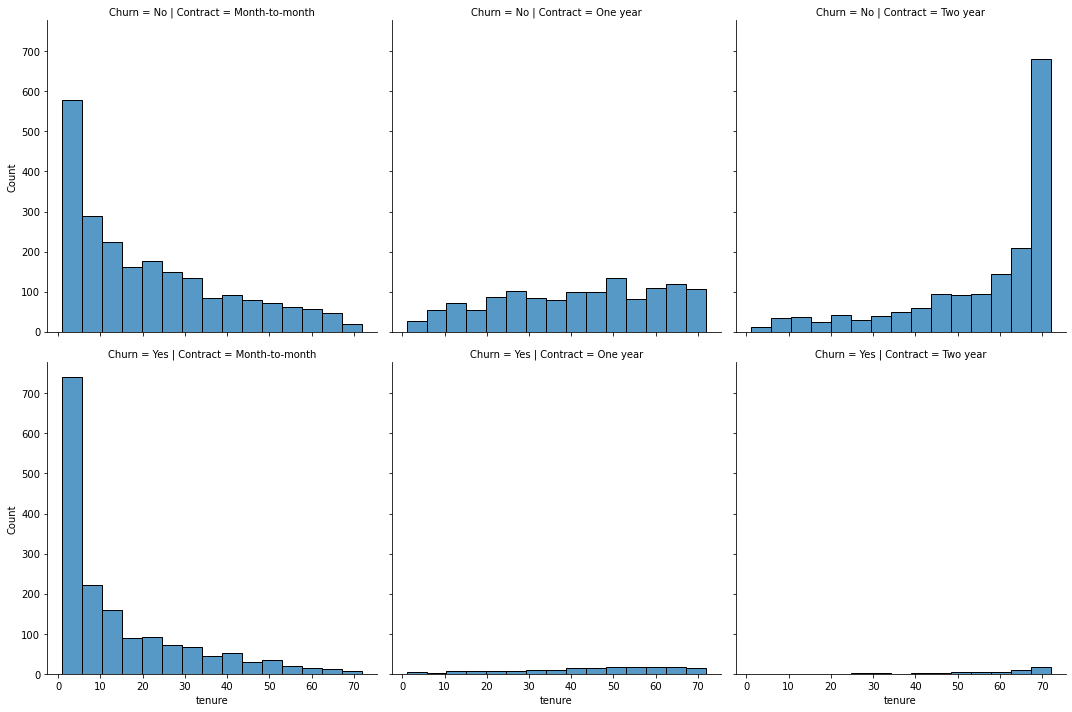

In [17]:
sbn.displot(data=df,x="tenure",col="Contract",row="Churn")

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [158]:
#CODE HERE

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

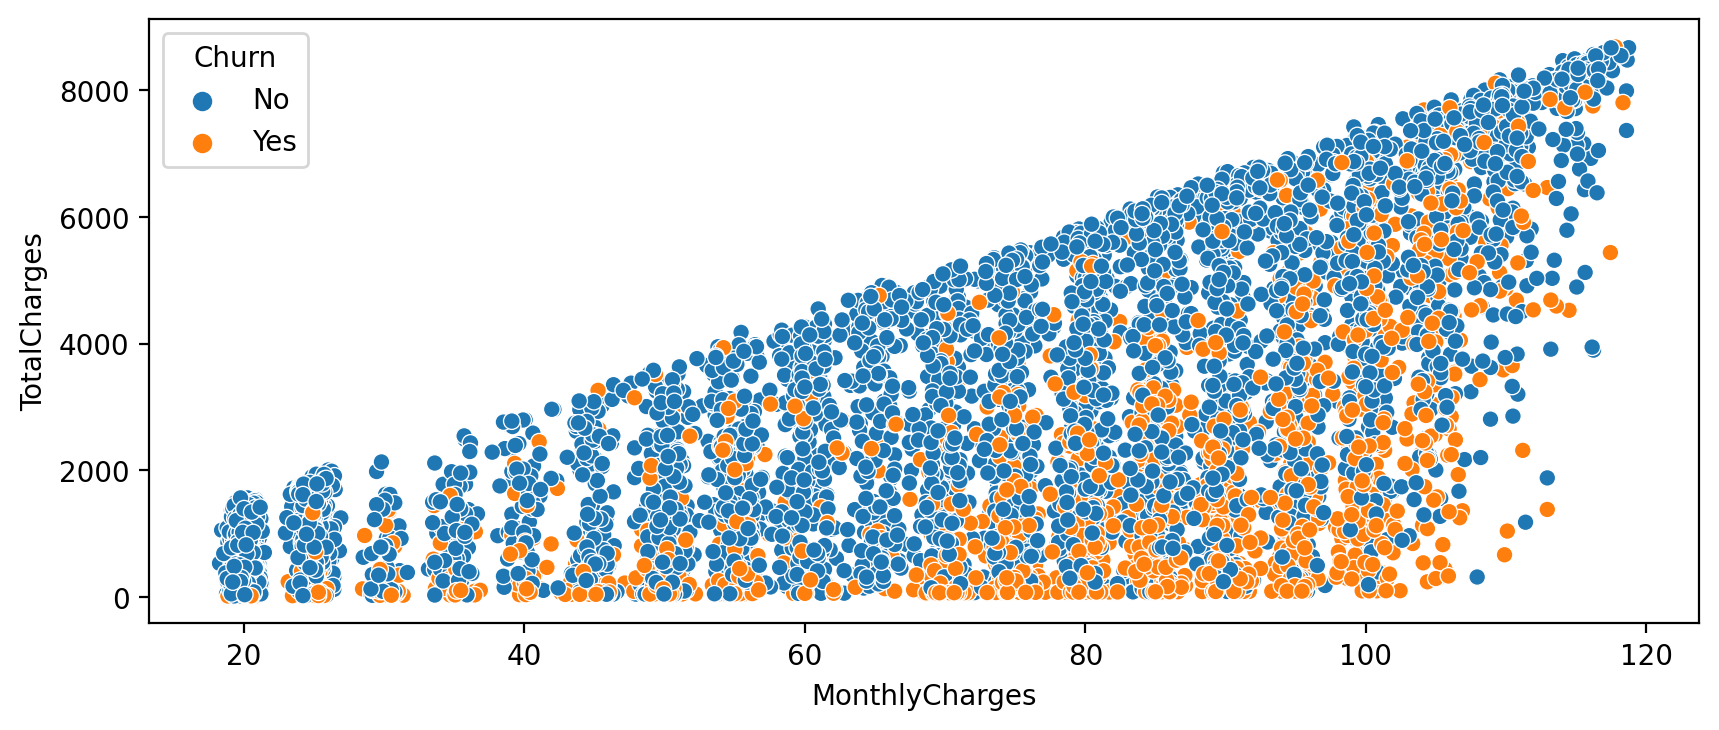

In [53]:
plt.figure(figsize=(10,4),dpi=200)
sbn.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue="Churn")

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [161]:
#CODE HERE

In [19]:
tenure_group=df.groupby(["Churn","tenure"]).count()
tenure_group

customerID  gender  SeniorCitizen  Partner  Dependents  \
Churn tenure                                                           
No    1              233     233            233      233         233   
      2              115     115            115      115         115   
      3              106     106            106      106         106   
      4               93      93             93       93          93   
      5               69      69             69       69          69   
...                  ...     ...            ...      ...         ...   
Yes   68               9       9              9        9           9   
      69               8       8              8        8           8   
      70              11      11             11       11          11   
      71               6       6              6        6           6   
      72               6       6              6        6           6   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn tenure                                                                 
No    1                233            233              233             233   
      2                115            115              115             115   
      3                106            106              106             106   
      4                 93             93               93              93   
      5                 69             69               69              69   
...                    ...            ...              ...             ...   
Yes   68                 9              9                9               9   
      69                 8              8                8               8   
      70                11             11               11              11   
      71                 6              6                6               6   
      72                 6              6                6               6   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn tenure                                                             
No    1                233               233          233          233   
      2                115               115          115          115   
      3                106               106          106          106   
      4                 93                93           93           93   
      5                 69                69           69           69   
...                    ...               ...          ...          ...   
Yes   68                 9                 9            9            9   
      69                 8                 8            8            8   
      70                11                11           11           11   
      71                 6                 6            6            6   
      72                 6                 6            6            6   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn tenure                                                               
No    1                   233       233               233            233   
      2                   115       115               115            115   
      3                   106       106               106            106   
      4                    93        93                93             93   
      5                    69        69                69             69   
...                       ...       ...               ...            ...   
Yes   68                    9         9                 9              9   
      69                    8         8                 8              8   
      70                   11        11                11             11   
      71                    6         6                 6              6   
      72                    6         6                 6              6   

              MonthlyCharges  TotalCharges  
Churn tenure                                
No    1             

In [21]:
no_=df.groupby(["Churn","tenure"]).count().transpose()["No"]
yes_=df.groupby(["Churn","tenure"]).count().transpose()["Yes"]
yes_per=100*yes_/(no_+yes_)
yes_per

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [22]:
yes_trans=yes_per.transpose()

In [23]:
yes_trans["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [165]:
#CODE HERE

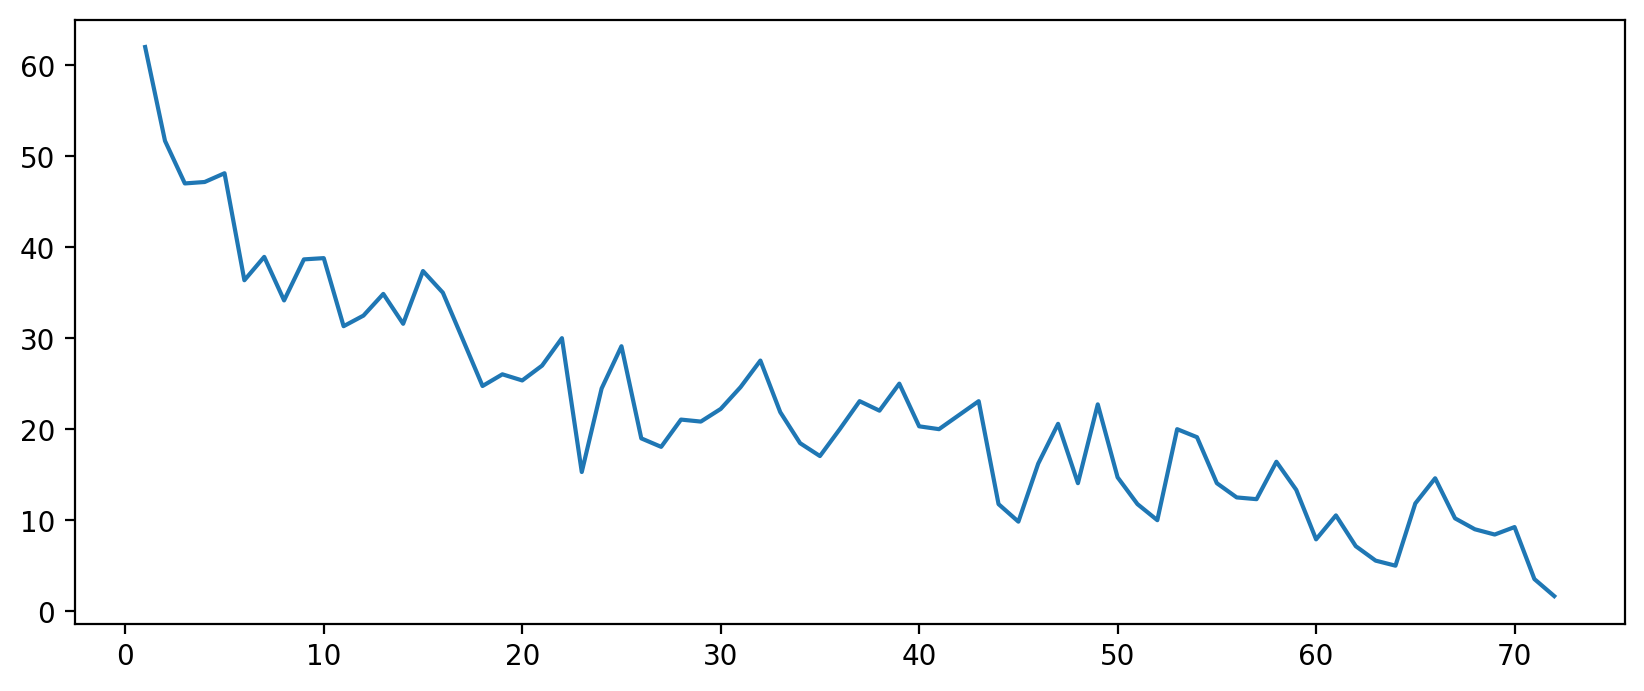

In [24]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,73),yes_trans["customerID"])

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [167]:
# CODE HERE

In [25]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif 12<tenure<25:
        return '12-24 Months'
    elif 24<tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [26]:
df["Tenure Cohort"]=df["tenure"].apply(cohort)

In [27]:
df[["Tenure Cohort","tenure"]]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [171]:
#CODE HERE

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

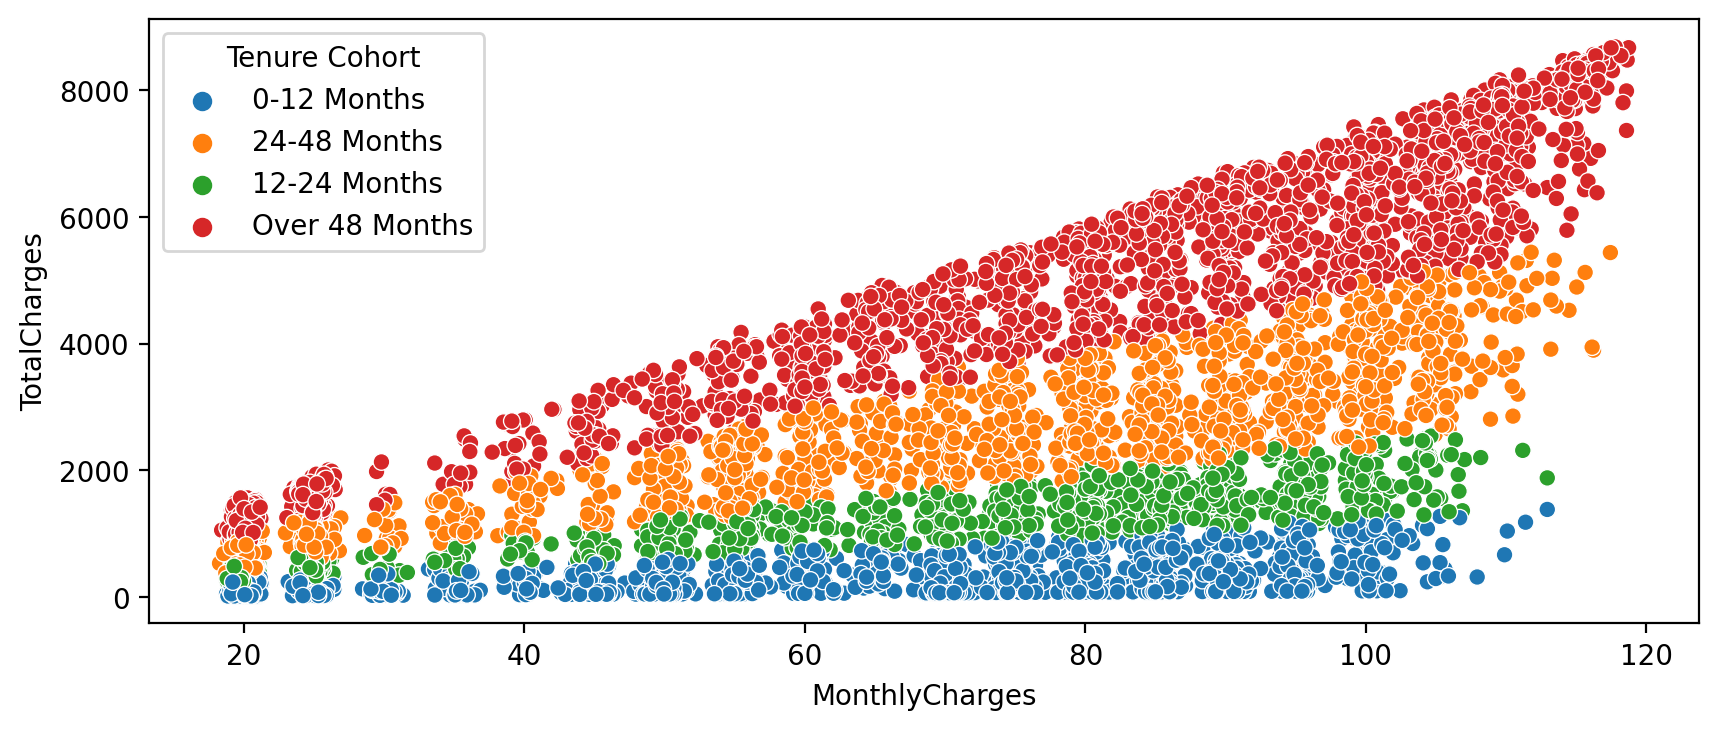

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sbn.scatterplot(data=df,y="TotalCharges",x="MonthlyCharges",hue="Tenure Cohort")

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [1]:
# CODE HERE

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

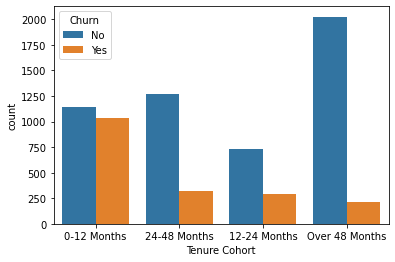

In [32]:
sbn.countplot(data=df,x="Tenure Cohort",hue="Churn")

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [174]:
#CODE HERE

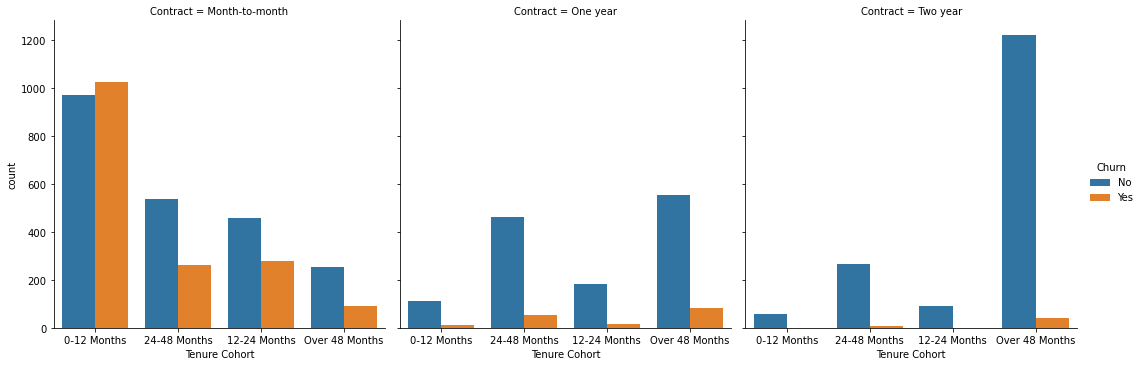

In [36]:

sbn.catplot(data=df,x="Tenure Cohort",col="Contract",hue="Churn",kind="count")

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [178]:
#CODE HERE

In [37]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [38]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [183]:
#CODE HERE

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)
preds = dt.predict(X_test)
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



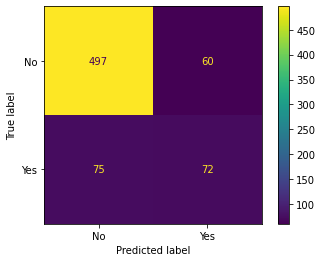

In [44]:
plot_confusion_matrix(dt,X_test,y_test)

In [45]:
dt.feature_importances_

array([0.01082504, 0.42391407, 0.04492202, 0.0653611 , 0.00123697,
       0.        , 0.        , 0.        , 0.00785158, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.02628952, 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

<AxesSubplot:>

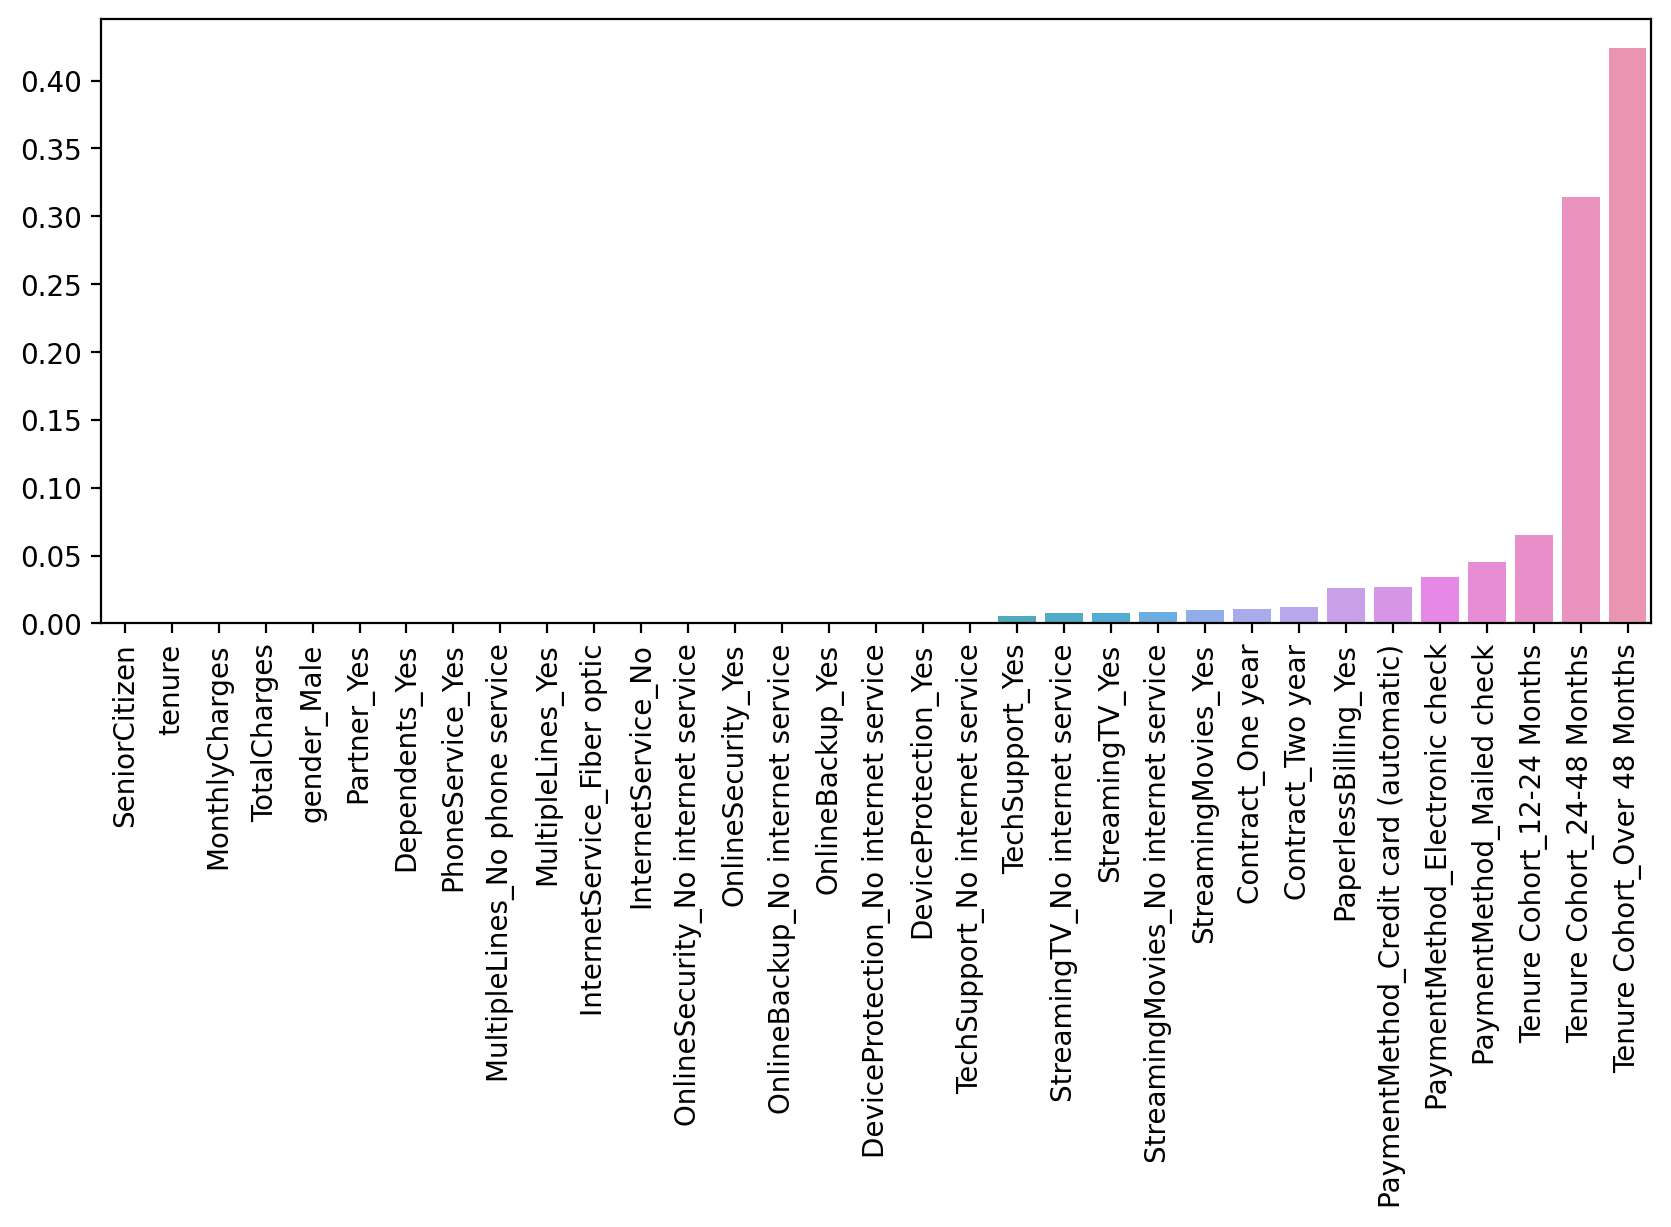

In [50]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation='90')
sbn.barplot(x=X.columns,y=np.sort(dt.feature_importances_))

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [259]:
#CODE HERE

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.49      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704



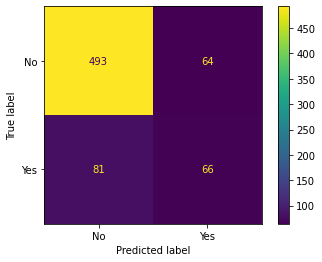

In [55]:
plot_confusion_matrix(rf,X_test,y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [ ]:
#CODE HERE

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
rf=GradientBoostingClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



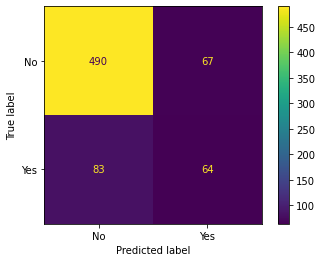

In [57]:
plot_confusion_matrix(rf,X_test,y_test)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



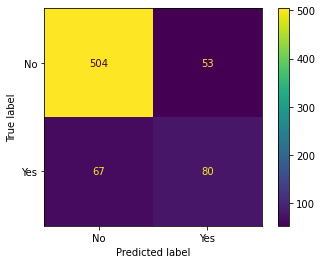

In [62]:
from sklearn.ensemble import AdaBoostClassifier
rf=AdaBoostClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(rf,X_test,y_test)

**TASK: Analyze your results, which model performed best for you?**

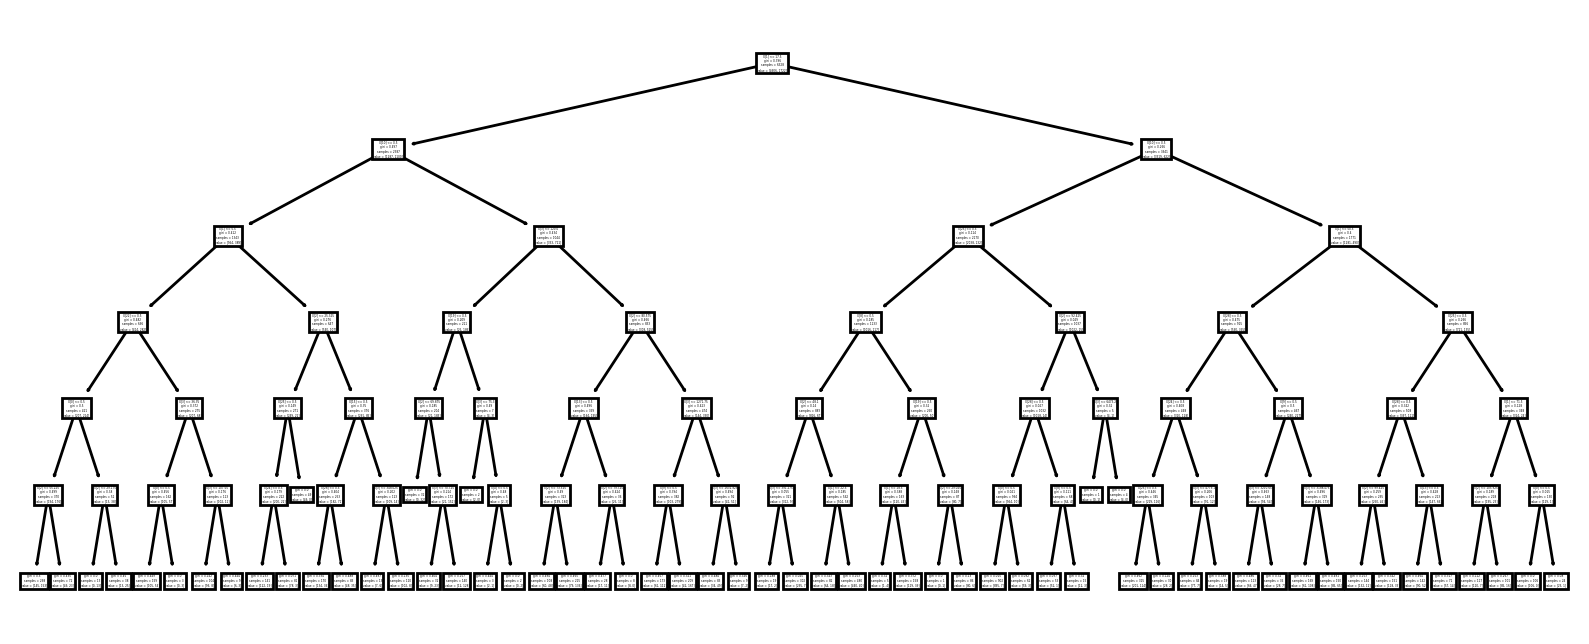

In [68]:
plt.figure(figsize=(10,4),dpi=200)
from sklearn.tree import plot_tree
plot_tree(dt);

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!